##  Data Collection

In [1]:
!pip install ucimlrepo

In [21]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
# fetch dataset
optical_recognition_of_handwritten_digits = fetch_ucirepo(id=80)

# data (as pandas dataframes)
X = optical_recognition_of_handwritten_digits.data.features
y = optical_recognition_of_handwritten_digits.data.targets

# metadata
print(optical_recognition_of_handwritten_digits.metadata)

# variable information
print(optical_recognition_of_handwritten_digits.variables)

{'uci_id': 80, 'name': 'Optical Recognition of Handwritten Digits', 'repository_url': 'https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits', 'data_url': 'https://archive.ics.uci.edu/static/public/80/data.csv', 'abstract': 'Two versions of this database available; see folder', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 5620, 'num_features': 64, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Wed Aug 23 2023', 'dataset_doi': '10.24432/C50P49', 'creators': ['E. Alpaydin', 'C. Kaynak'], 'intro_paper': {'ID': 280, 'type': 'NATIVE', 'title': 'Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition', 'authors': 'C. Kaynak', 'venue': 'MSc Thesis, Institute of Graduate Studies in Science and Engineering, 

In [4]:
# Check the first few rows of the dataset
print(X.head())
print(y.head())

# Get basic information about the dataset
print(X.info())
print(X.describe())

   Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0           0           1           6          15          12           1   
1           0           0          10          16           6           0   
2           0           0           8          15          16          13   
3           0           0           0           3          11          16   
4           0           0           5          14           4           0   

   Attribute7  Attribute8  Attribute9  Attribute10  ...  Attribute55  \
0           0           0           0            7  ...            0   
1           0           0           0            7  ...            3   
2           0           0           0            1  ...            0   
3           0           0           0            0  ...            0   
4           0           0           0            0  ...           12   

   Attribute56  Attribute57  Attribute58  Attribute59  Attribute60  \
0            0            0       

## Check the Dataset Structure

In [5]:
# Check the shape of features and target data
print(X.shape)  # Shape of feature matrix
print(y.shape)  # Shape of target labels

(5620, 64)
(5620, 1)


## Data Preprocessing

In [6]:
# Check the shape of features and target data
print(X.shape)  # Shape of feature matrix
print(y.shape)  # Shape of target labels

(5620, 64)
(5620, 1)


## Data Visualization

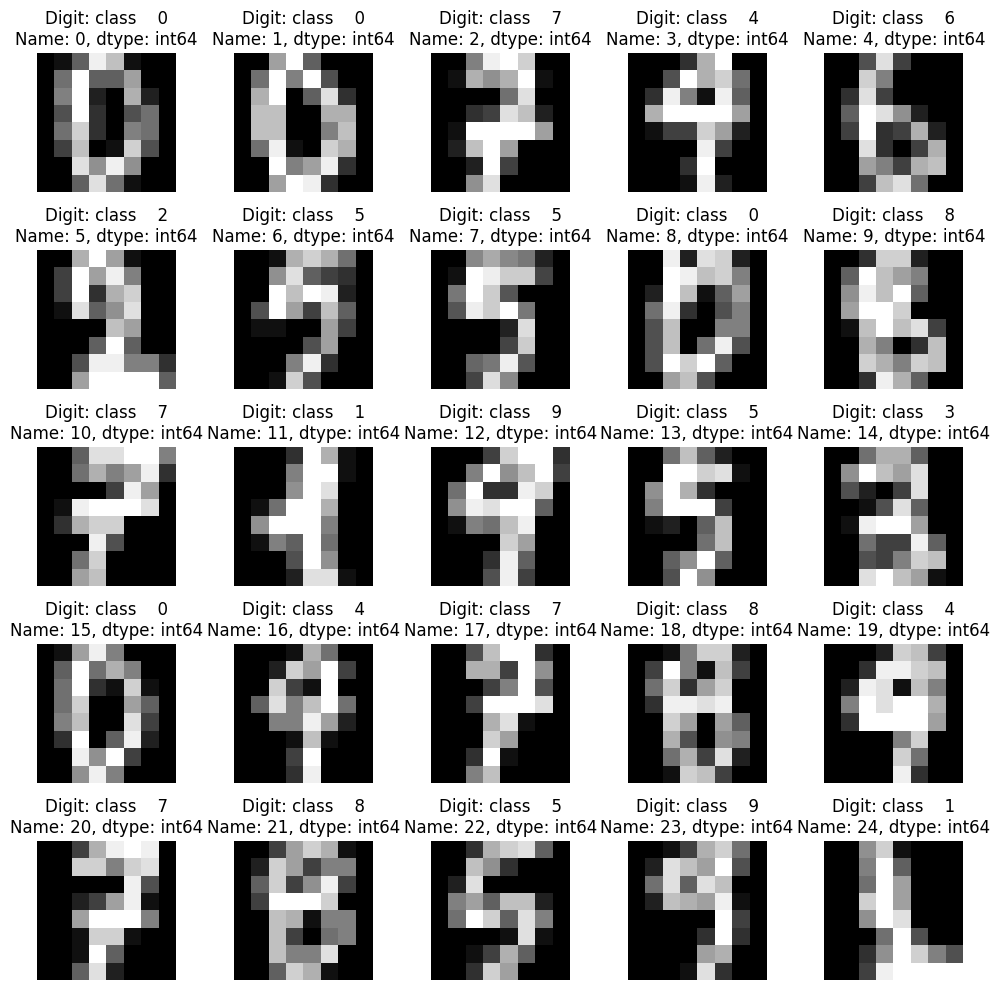

In [7]:
# Set the grid size
grid_rows, grid_cols = 5, 5

# Create subplots with 5 rows and 5 columns
fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(10, 10))

# Loop through and plot 25 digits
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(X.iloc[i]).reshape(8, 8), cmap='gray')  # Reshape 64 features into 8x8 image
    ax.set_title(f'Digit: {y.iloc[i]}')
    ax.axis('off')  # Remove axis lines and labels for cleaner visualization

plt.tight_layout()  # Adjusts layout so titles and images don't overlap
plt.show()

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale your features

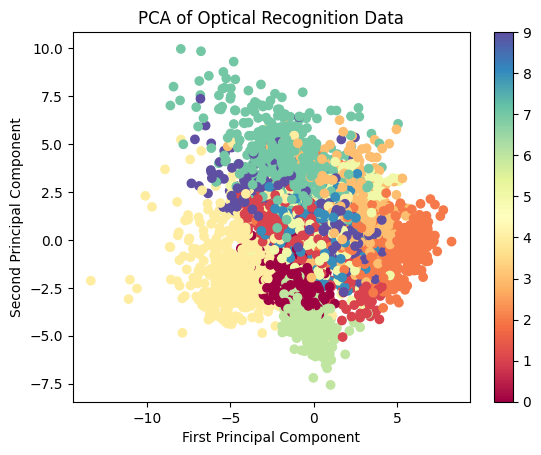

In [9]:
# Reduce the feature space using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert the target (y) to a NumPy array
y_array = y.to_numpy()

# Visualize the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_array, cmap='Spectral')
plt.title('PCA of Optical Recognition Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

## Distribution Analysis

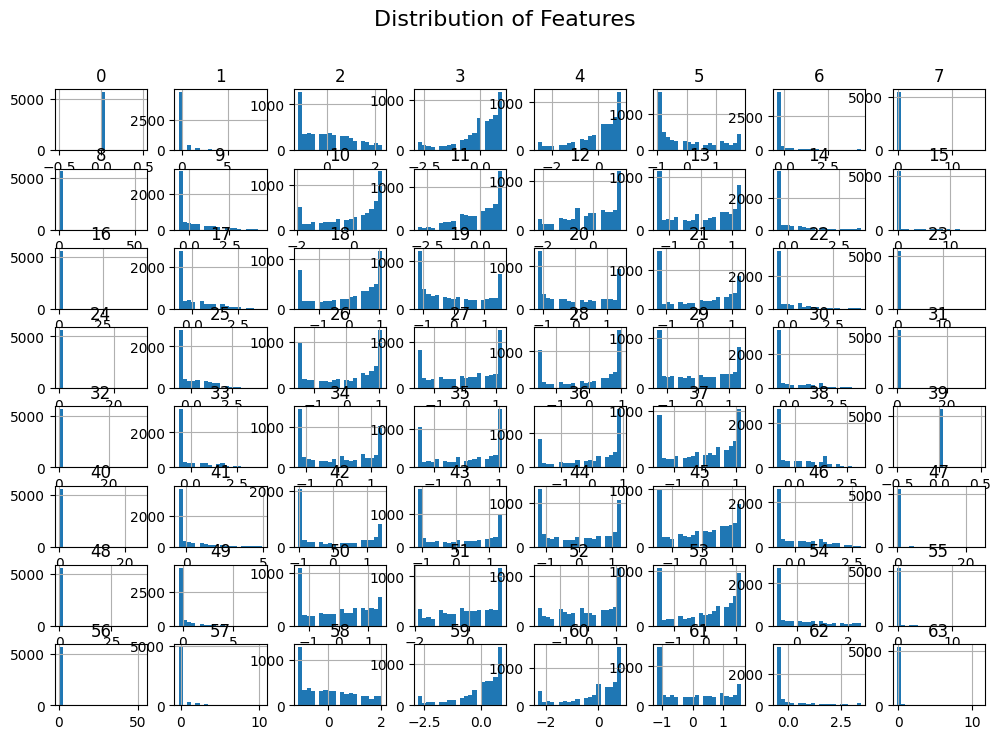

In [10]:
# Step 2: Convert the scaled data to a DataFrame for easier plotting
X_df_scaled = pd.DataFrame(X_scaled)

# Step 3: Plot histograms for each feature
X_df_scaled.hist(figsize=(12, 8), bins=20)  # You can adjust the bin size as needed
plt.suptitle('Distribution of Features', fontsize=16)
plt.show()

## Correlation Analysis

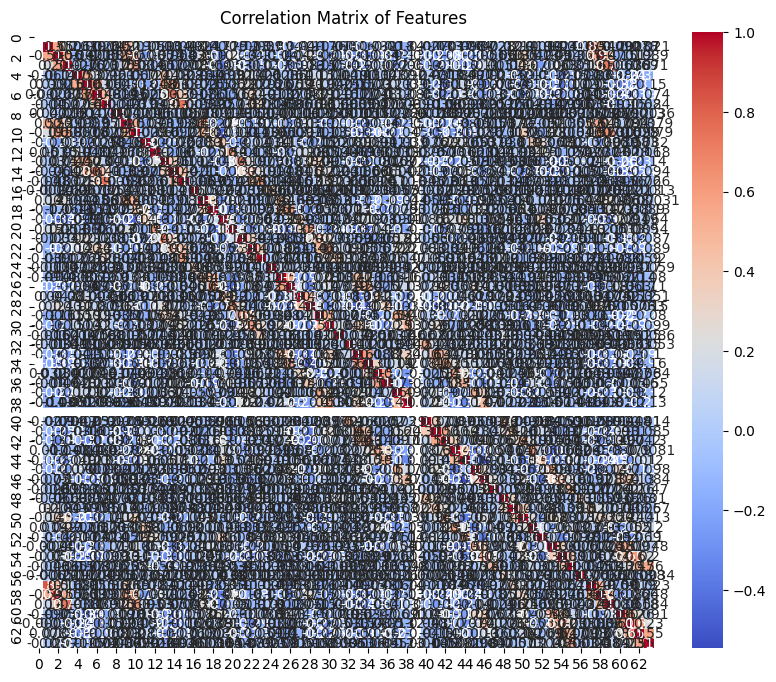

In [11]:
# Correlation Analysis
corr_matrix = pd.DataFrame(X_scaled).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

## Handle Missing Values

In [12]:
missing_values = X.isnull().sum()
print("Missing values in each feature:\n", missing_values[missing_values > 0])

Missing values in each feature:
 Series([], dtype: int64)


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Dimensionality Reduction

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

## Outlier Detection and Treatment

In [15]:
from scipy import stats

z_scores = np.abs(stats.zscore(X_scaled))
X_cleaned = X_scaled[(z_scores < 3).all(axis=1)]

## Splitting the Dataset

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## Display shapes of the splits

In [17]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (4496, 64)
Validation set shape: (562, 64)
Test set shape: (562, 64)


## Check for Class Imbalance

Class counts:
 class
0        554
1        571
2        557
3        572
4        568
5        558
6        558
7        566
8        554
9        562
Name: count, dtype: int64


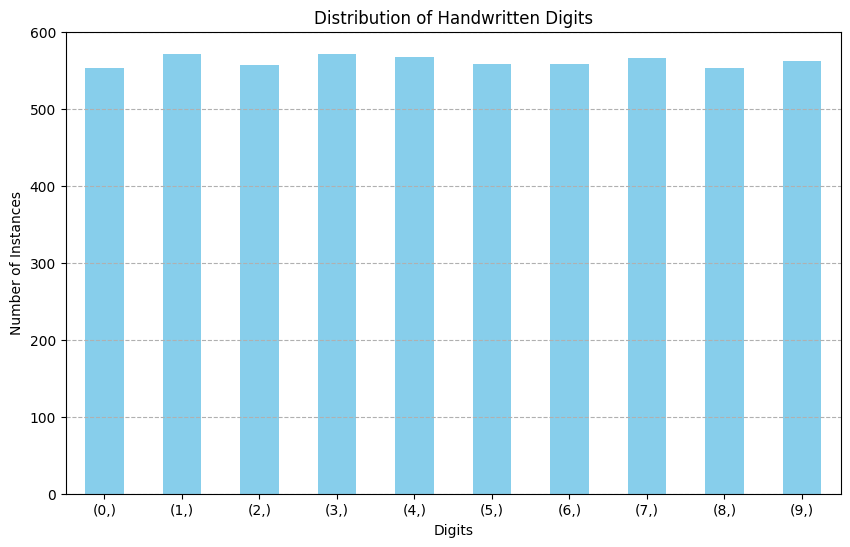

In [18]:
class_counts = y.value_counts().sort_index()

print("Class counts:\n", class_counts)

plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Handwritten Digits')
plt.xlabel('Digits')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()


## Feature Selection

## Univariate Selection

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

k = 20
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X_scaled, y)

selected_indices = selector.get_support(indices=True)
print(f"Selected features (indices): {selected_indices}")

Selected features (indices): [ 5  6 13 19 20 21 26 28 30 33 34 38 41 42 43 44 46 54 61 62]


##  L1 Regularization

In [24]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(X_scaled, y)

coefficients = lasso.coef_

selected_lasso_indices = np.where(coefficients != 0)[0]
print(f"Selected features (indices) using Lasso: {selected_lasso_indices}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Selected features (indices) using Lasso: [ 1  2  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 24 25 26 27
 28 29 30 33 34 35 36 37 38 41 42 43 44 45 46 49 50 51 52 53 54 55 57 58
 59 60 61 63]


## Prepare the Dataset with Selected Features

##  Indices from Univariate Selection

In [25]:
univariate_selected_indices = [5, 6, 13, 19, 20, 21, 26, 28, 30, 33, 34, 38, 41, 42, 43, 44, 46, 54, 61, 62]

## Indices from Lasso

In [26]:
lasso_selected_indices = [1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27,
                          28, 29, 30, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 49, 50, 51, 52, 53, 54,
                          55, 57, 58, 59, 60, 61, 63]

## Prepare new datasets with selected features

In [27]:
X_univariate_selected = X_scaled[:, univariate_selected_indices]
X_lasso_selected = X_scaled[:, lasso_selected_indices]

## Displaying Prepared Datasets

In [28]:
X_univariate_df = pd.DataFrame(X_univariate_selected, columns=[f'Feature_{i}' for i in univariate_selected_indices])
X_lasso_df = pd.DataFrame(X_lasso_selected, columns=[f'Feature_{i}' for i in lasso_selected_indices])

print("Univariate Selected Features Dataset:")
print(X_univariate_df.head())

print("\nLasso Selected Features Dataset:")
print(X_lasso_df.head())

Univariate Selected Features Dataset:
   Feature_5  Feature_6  Feature_13  Feature_19  Feature_20  Feature_21  \
0     0.0625        0.0      0.6250       0.125      0.0000      0.6875   
1     0.0000        0.0      0.3125       0.000      0.3750      0.8750   
2     0.8125        0.0      1.0000       0.000      0.4375      0.8750   
3     1.0000        0.0      0.8125       0.500      0.0625      0.9375   
4     0.0000        0.0      0.0000       0.250      0.0000      0.0000   

   Feature_26  Feature_28  Feature_30  Feature_33  Feature_34  Feature_38  \
0      1.0000      0.0000      0.4375    0.466667      0.8125    0.500000   
1      0.7500      0.0000      0.6875    0.800000      0.7500    0.857143   
2      0.1875      0.8750      0.1250    0.066667      1.0000    0.714286   
3      1.0000      1.0000      0.6250    0.066667      0.2500    0.142857   
4      1.0000      0.5625      0.0000    0.266667      1.0000    0.142857   

   Feature_41  Feature_42  Feature_43  Feature_4

# Model Comparison, Finalize the best model

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Initialize models

In [32]:
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='linear', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

## Train and evaluate models

In [33]:
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    results[model_name] = accuracy

    # Display evaluation metrics
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_val, y_val_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Model: Decision Tree
Accuracy: 0.9163701067615658
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        60
           1       0.83      0.91      0.87        43
           2       0.93      0.92      0.92        59
           3       0.94      0.97      0.95        60
           4       0.95      0.92      0.93        62
           5       0.90      0.87      0.88        52
           6       0.96      0.96      0.96        56
           7       0.95      0.94      0.94        64
           8       0.82      0.92      0.87        51
           9       0.85      0.80      0.82        55

    accuracy                           0.92       562
   macro avg       0.91      0.91      0.91       562
weighted avg       0.92      0.92      0.92       562

Confusion Matrix:
 [[57  0  0  0  1  0  1  0  1  0]
 [ 0 39  0  0  1  0  1  0  0  2]
 [ 0  2 54  1  0  0  0  0  1  1]
 [ 0  0  0 58  0  0  0  0  1  1]
 [ 0  1  1  0 5

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Model: SVM
Accuracy: 0.9768683274021353
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      0.93      0.95        43
           2       1.00      0.98      0.99        59
           3       0.97      0.98      0.98        60
           4       1.00      0.97      0.98        62
           5       0.96      0.94      0.95        52
           6       0.98      1.00      0.99        56
           7       0.98      1.00      0.99        64
           8       0.89      1.00      0.94        51
           9       1.00      0.95      0.97        55

    accuracy                           0.98       562
   macro avg       0.98      0.98      0.98       562
weighted avg       0.98      0.98      0.98       562

Confusion Matrix:
 [[60  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  3  0]
 [ 0  0 58  0  0  1  0  0  0  0]
 [ 0  0  0 59  0  1  0  0  0  0]
 [ 0  0  0  0 60  0  1  0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Model: Random Forest
Accuracy: 0.9786476868327402
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.93      1.00      0.97        43
           2       1.00      0.98      0.99        59
           3       0.98      0.98      0.98        60
           4       1.00      0.98      0.99        62
           5       0.98      0.92      0.95        52
           6       0.98      1.00      0.99        56
           7       0.98      1.00      0.99        64
           8       0.93      0.98      0.95        51
           9       0.98      0.93      0.95        55

    accuracy                           0.98       562
   macro avg       0.98      0.98      0.98       562
weighted avg       0.98      0.98      0.98       562

Confusion Matrix:
 [[60  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 58  0  0  0  0  0  0  1]
 [ 0  0  0 59  0  1  0  0  0  0]
 [ 0  0  0  0 6

## Select the best model

In [34]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Best Model: Random Forest with Accuracy: 0.9786


## Test the best model

#### Train the best model on the full training set

In [36]:
X_train_full = np.vstack((X_train, X_val))
y_train_full = np.concatenate([y_train, y_val])

best_model.fit(X_train_full, y_train_full)
y_test_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


#### Evaluate on the test set

In [37]:
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy of {best_model_name}: {test_accuracy:.4f}")
print("Classification Report on Test Set:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix on Test Set:\n", confusion_matrix(y_test, y_test_pred))


Test Accuracy of Random Forest: 0.9858
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        48
           1       0.97      0.98      0.97        59
           2       1.00      1.00      1.00        48
           3       0.98      0.98      0.98        58
           4       0.96      0.98      0.97        55
           5       1.00      0.98      0.99        45
           6       0.99      0.99      0.99        67
           7       0.98      1.00      0.99        60
           8       0.98      0.98      0.98        54
           9       1.00      0.99      0.99        68

    accuracy                           0.99       562
   macro avg       0.99      0.99      0.99       562
weighted avg       0.99      0.99      0.99       562

Confusion Matrix on Test Set:
 [[47  0  0  0  1  0  0  0  0  0]
 [ 0 58  0  0  0  0  0  1  0  0]
 [ 0  0 48  0  0  0  0  0  0  0]
 [ 0  0  0 57  0  0  0  0  1  0]
 [

## Plot model comparison

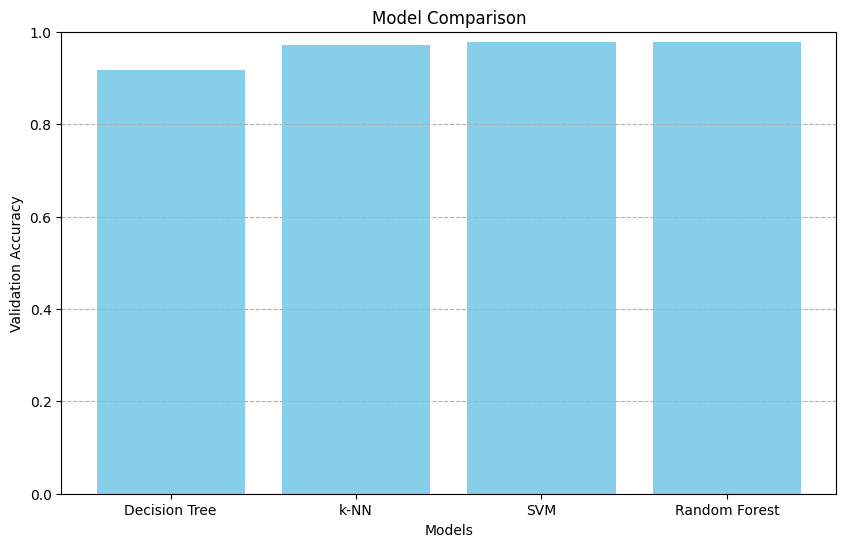

In [38]:
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--')
plt.show()